In [50]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [ ]:
api_key = "YOUR_API_KEY_HERE"
channel_ids = ['UC6-F5tO8uklgE9Zy8IvbdFw', #SonySAB
               'UCJ6nMHaJPZvsJ-HmUmj1SeA', #Lionsgate Movies
               'UCvC4D8onUfXzvjTOM-dBfEA', #Marvel Entertainment
               'UCiifkYAs_bq1pt_zbNAzYGg', #DC
               'UCz97F7dMxBNOfGYu3rx8aCw' #Sony Pictures Entertainment
              ]

youtube = build('youtube','v3',developerKey=api_key)

##Function to get channel statistics##

In [60]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids))
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(channel_name = response['items'][i]['snippet']['title'],
                subscribers = response['items'][i]['statistics']['subscriberCount'],
                views = response['items'][i]['statistics']['viewCount'],
                total_videos = response['items'][i]['statistics']['videoCount'],
                playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
               )
        all_data.append(data)
    return all_data
    

In [61]:
channel_statistics = get_channel_stats(youtube,channel_ids)

In [62]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,Lionsgate Movies,2220000,2453012475,2102,UUJ6nMHaJPZvsJ-HmUmj1SeA
1,Sony Pictures Entertainment,7040000,5109294992,4904,UUz97F7dMxBNOfGYu3rx8aCw
2,Marvel Entertainment,20300000,5856259757,8852,UUvC4D8onUfXzvjTOM-dBfEA
3,DC,4450000,1923517340,3921,UUiifkYAs_bq1pt_zbNAzYGg
4,Sony SAB,88900000,109596787535,78595,UU6-F5tO8uklgE9Zy8IvbdFw


In [63]:
channel_data.dtypes

channel_name    object
subscribers     object
views           object
total_videos    object
playlist_id     object
dtype: object

In [64]:
channel_data['subscribers'] = pd.to_numeric(channel_data['subscribers'])
channel_data['views'] = pd.to_numeric(channel_data['views'])
channel_data['total_videos'] = pd.to_numeric(channel_data['total_videos'])
channel_data.dtypes

channel_name    object
subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

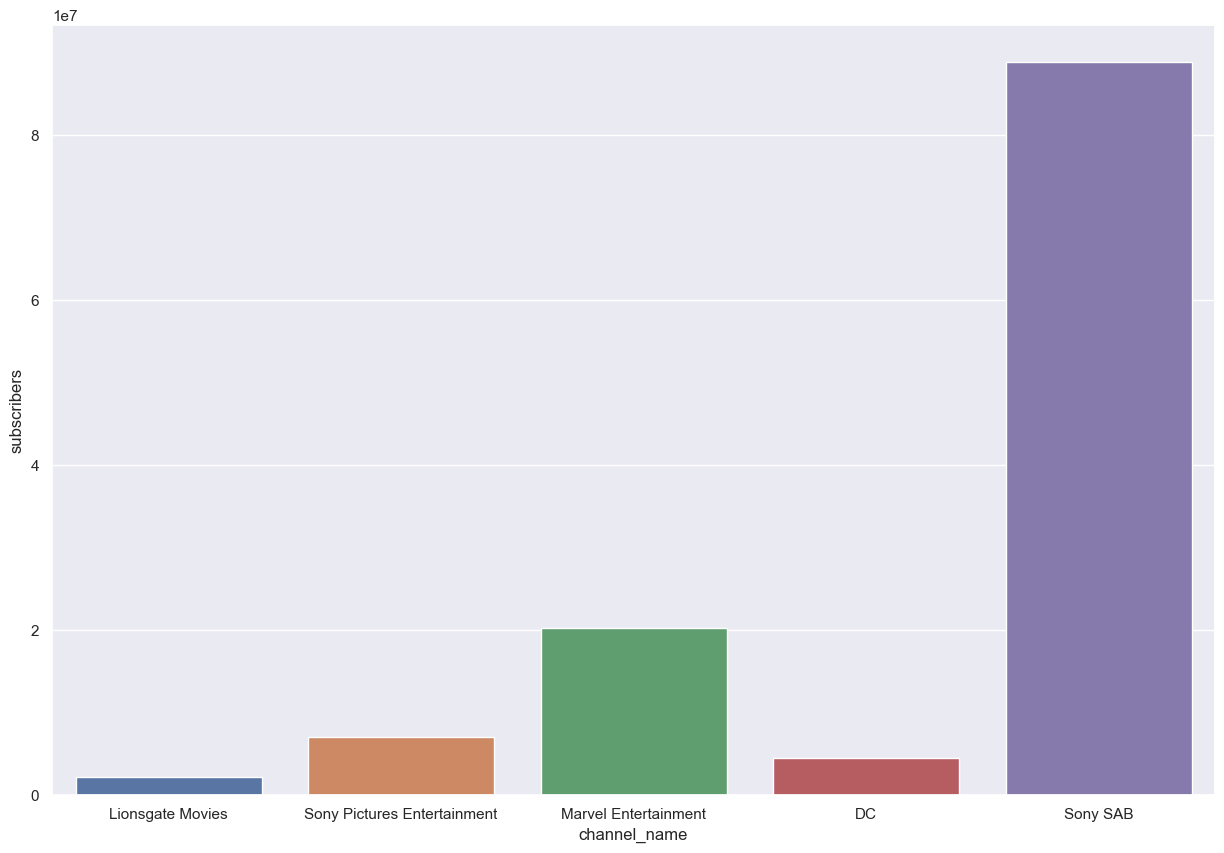

In [65]:
sns.set(rc = {'figure.figsize': (15,10)})
ax = sns.barplot(x = 'channel_name', y = 'subscribers', data = channel_data)

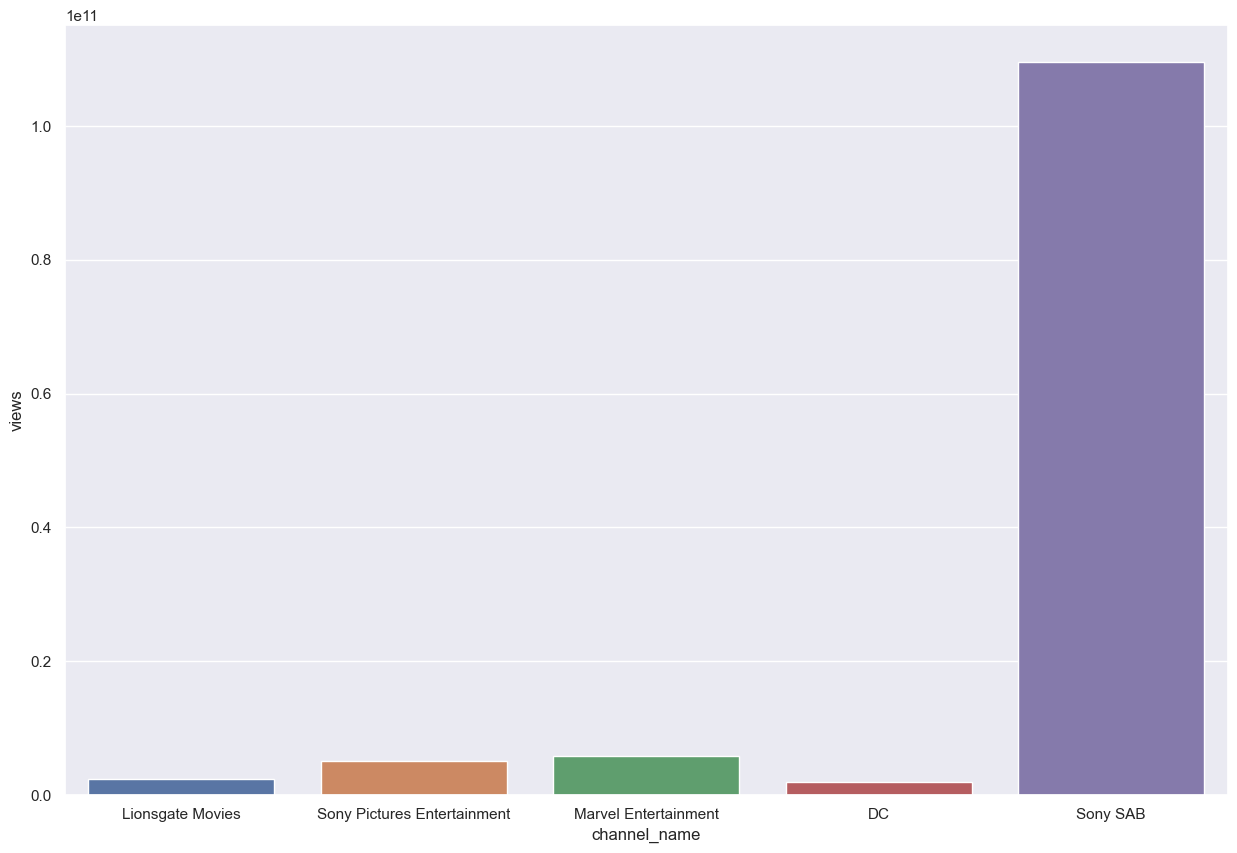

In [66]:
sns.set(rc = {'figure.figsize': (15,10)})
ax = sns.barplot(x = 'channel_name', y = 'views', data = channel_data)

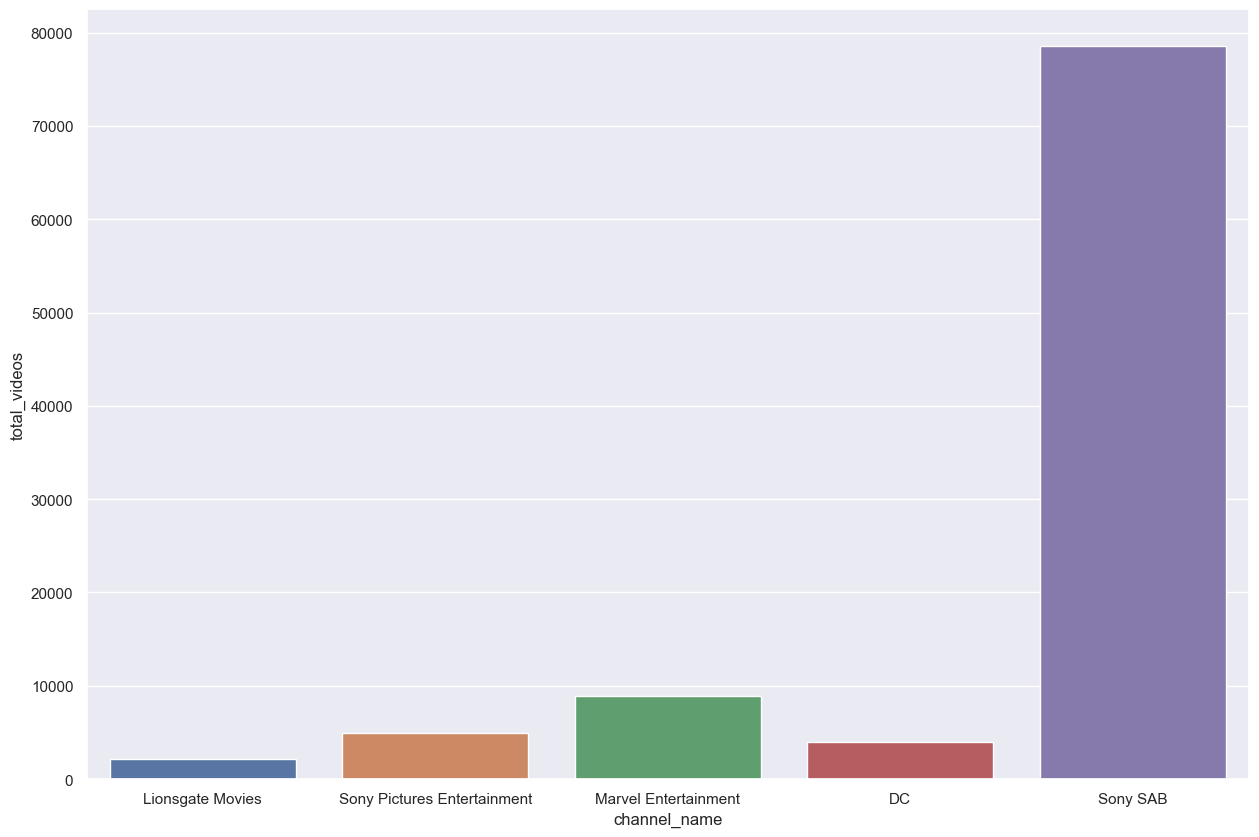

In [67]:
sns.set(rc = {'figure.figsize': (15,10)})
ax = sns.barplot(x = 'channel_name', y = 'total_videos', data = channel_data)

## Function to get video ids

In [69]:
channel_data

,channel_name,subscribers,views,total_videos,playlist_id
0,Lionsgate Movies,2220000,2453012475,2102,UUJ6nMHaJPZvsJ-HmUmj1SeA
1,Sony Pictures Entertainment,7040000,5109294992,4904,UUz97F7dMxBNOfGYu3rx8aCw
2,Marvel Entertainment,20300000,5856259757,8852,UUvC4D8onUfXzvjTOM-dBfEA
3,DC,4450000,1923517340,3921,UUiifkYAs_bq1pt_zbNAzYGg
4,Sony SAB,88900000,109596787535,78595,UU6-F5tO8uklgE9Zy8IvbdFw


In [70]:
playlist_id = channel_data.loc[channel_data['channel_name'] == 'Sony SAB','playlist_id'].iloc[0]

In [71]:
playlist_id

'UU6-F5tO8uklgE9Zy8IvbdFw'

In [96]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50)

    response = request.execute()

    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages :
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
        
    return video_ids

In [97]:
video_ids = get_video_ids(youtube, playlist_id)

In [98]:
video_ids

['mOjOAL-nl7c',
 '9QBBujxfaLY',
 'I_BmzkRrq6U',
 'S5xUJZA5K74',
 'z0k37q2GYRs',
 '9XsPotzE538',
 'ipA932byMW4',
 'bHC7yzx7rwg',
 'jorx1ErahF0',
 'JvkJUxGMJhs',
 '44YMHOUO2BE',
 'Bsh2slvKncA',
 'D_JKU4SJ83k',
 'qM71spjN-5k',
 'w-3aLeGwgqw',
 'kB8n5FcSrcY',
 'c4H6mK2mzPI',
 'v7b8sbt5Iac',
 'D_JFHIZry4c',
 'jigPentuYqA',
 'mb5mADP2OY4',
 'diQWZgrSiSk',
 'MF40AGT_Ufg',
 'yVXlnyxDMLY',
 'olLr2o2cmmQ',
 'p0I7Lj2LiRE',
 '-dmSDNInMAs',
 'bBueW5lRwc8',
 'JGMMeJcnKG0',
 'p42BkDfMZPw',
 'cDEQJaUPLJk',
 'oINpxO6cnOk',
 'LQ0s7WOt_ss',
 'YcsAcZWJS4M',
 'gs-O6K9151I',
 'QH5qGkhXy_8',
 'sf_FCT6D_dM',
 'H53x1Pm6lsk',
 'EVNAHw3LQjE',
 'lCs0AAhKLZ4',
 'iOSB-Vl7KYQ',
 'BGQJlx_O26o',
 'JdGzBkqy3CM',
 'JrV4Aia6rwI',
 'X6Gfu5MMwn4',
 'zyvklmITrjw',
 'f7NvysJt1sM',
 'Z0TbQD14ntA',
 'vkHjpW6n-XU',
 'Xo4eXDO-c1o',
 '34n_iPGQvPQ',
 'W6dBSdPGnEc',
 'fQicxWB5KJs',
 'ucYycXz7cYg',
 'Cu3NQb5T1aE',
 'upGSoT3Fw8g',
 'EoYSqeRF7wQ',
 'uvMmvNat0Go',
 'mX4L088QbXo',
 'YPGANWIJCP4',
 'MZGyXMIWvhY',
 'zJkqDidUKM0',
 'C3xl6t

##Function to get video details

In [112]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0,len(video_ids), 50):
        request = youtube.videos().list(
                part = 'snippet,statistics',
                id = ','.join(video_ids[i:i+50]))
    
        response = request.execute()
    return response
get_video_details(youtube, video_ids)

{'kind': 'youtube#videoListResponse',
 'etag': 'WFLDZw1PNXDaf8N2jn91dl1LXRY',
 'items': [{'kind': 'youtube#video',
   'etag': 'RSEYiDONgULib5wjEwxJQTr6wPY',
   'id': 'BPdf6PnmtWE',
   'snippet': {'publishedAt': '2022-10-09T11:30:02Z',
    'channelId': 'UC6-F5tO8uklgE9Zy8IvbdFw',
    'title': 'Pushpa Impossible - Ep 104 & Ep 105 - RECAP - पुष्पा इम्पॉसिबल',
    'description': 'Click here to Subscribe to SAB TV Channel: https://www.youtube.com/user/sabtv?sub_confirmation=1\n\nClick here to watch recaps of Pushpa Impossible: https://www.youtube.com/playlist?list=PL6Rtnh6YJK7Y7KOwB66wUqxPl3a-kaVnQ\n\nWatch the recap of your favorite show, with all the new episodes.\n\nShow Name – Pushpa Impossible\nStar Cast – Karuna Pandey, Deshna Dugad, Naveen Pandit, Darshan Gurjar\nEpisode No - 104 & 105\nProduced By - J.D. Majethia\n\n#PushpaImpossible #पुष्पाइम्पॉसिबल #SAB\n\nAbout  Pushpa Impossible: \n----------------------------------------------------------------------\n Pushpa Impossible - The s

In [115]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0,len(video_ids), 50):
        request = youtube.videos().list(
                part = 'snippet,statistics',
                id = ','.join(video_ids[i:i+50]))
    
        response = request.execute()
        for video in response['items']:
            video_stats = dict(
                Title = video['snippet']['title'],
                published_date = video['snippet']['publishedAt'],
                views = video['statistics']['viewCount'],
                likes = video['statistics']['likeCount'],
                favouriteCount =  video['statistics']['favoriteCount'],
                comments = video['statistics']['commentCount']
            )
        all_video_stats.append(video_stats)
    return all_video_stats

In [116]:
video_details = get_video_details(youtube, video_ids)

In [117]:
video_details

[{'Title': 'कान्हा का आशीर्वाद हर problems से बचाता हैं  #shorts #Vanshaj #Kanha #blessings',
  'published_date': '2024-01-23T10:45:01Z',
  'views': '25476',
  'likes': '1007',
  'favouriteCount': '0',
  'comments': '4'},
 {'Title': 'Weekly ReLIV - Wagle Ki Duniya - Episodes 871 - 876 | 15 January 2024 To 20 January 2024',
  'published_date': '2024-01-21T15:30:16Z',
  'views': '8831',
  'likes': '72',
  'favouriteCount': '0',
  'comments': '8'},
 {'Title': 'Chachi Insults Jaidev | Aangan Aapno Kaa | Ep 34 | Full Episode | 18 Jan 2024',
  'published_date': '2024-01-20T14:30:11Z',
  'views': '25953',
  'likes': '679',
  'favouriteCount': '0',
  'comments': '11'},
 {'Title': 'Rajesh Leaves His Job | Wagle Ki Duniya | Ep 873 | Full Episode | 17 Jan 2024',
  'published_date': '2024-01-19T16:00:13Z',
  'views': '40283',
  'likes': '587',
  'favouriteCount': '0',
  'comments': '30'},
 {'Title': 'Antidote Nahi Mil Raha | Dhruv Tara - Samay Sadi Se Pare | Ep 278 | Full Episode | 16 Jan 2024',
 

In [118]:
len(video_details)

400

In [119]:
video_data = pd.DataFrame(video_details)
video_data

,Title,published_date,views,likes,favouriteCount,comments
0,कान्हा का आशीर्वाद हर problems से बचाता हैं #...,2024-01-23T10:45:01Z,25476,1007,0,4
1,Weekly ReLIV - Wagle Ki Duniya - Episodes 871 ...,2024-01-21T15:30:16Z,8831,72,0,8
2,Chachi Insults Jaidev | Aangan Aapno Kaa | Ep ...,2024-01-20T14:30:11Z,25953,679,0,11
3,Rajesh Leaves His Job | Wagle Ki Duniya | Ep 8...,2024-01-19T16:00:13Z,40283,587,0,30
4,Antidote Nahi Mil Raha | Dhruv Tara - Samay Sa...,2024-01-18T15:00:23Z,33816,852,0,25
...,...,...,...,...,...,...
395,Taarak Mehta Ka Ooltah Chashmah - तारक मेहता -...,2022-10-14T15:45:01Z,67348,1879,0,37
396,किसके लिए Gift लेकर इंतज़ार कर रहा है Jethalal?...,2022-10-13T10:08:36Z,950764,10670,0,107
397,NEW! Wagle Ki Duniya - Ep 477 - 11 Oct 2022 - ...,2022-10-11T16:00:25Z,72899,770,0,18
398,Maddam Sir - Ep 625 & Ep 626 - RECAP - मैड्डम सर,2022-10-09T12:00:22Z,177018,2611,0,22


In [120]:
video_data['published_date'] = pd.to_datetime(video_data['published_date']).dt.date

In [122]:
video_data['views'] = pd.to_numeric(video_data['views'])
video_data['likes'] = pd.to_numeric(video_data['likes'])
video_data['favouriteCount'] = pd.to_numeric(video_data['favouriteCount'])
video_data['comments'] = pd.to_numeric(video_data['comments'])
video_data.dtypes

Title             object
published_date    object
views              int64
likes              int64
favouriteCount     int64
comments           int64
dtype: object

In [123]:
video_data

,Title,published_date,views,likes,favouriteCount,comments
0,कान्हा का आशीर्वाद हर problems से बचाता हैं #...,2024-01-23,25476,1007,0,4
1,Weekly ReLIV - Wagle Ki Duniya - Episodes 871 ...,2024-01-21,8831,72,0,8
2,Chachi Insults Jaidev | Aangan Aapno Kaa | Ep ...,2024-01-20,25953,679,0,11
3,Rajesh Leaves His Job | Wagle Ki Duniya | Ep 8...,2024-01-19,40283,587,0,30
4,Antidote Nahi Mil Raha | Dhruv Tara - Samay Sa...,2024-01-18,33816,852,0,25
...,...,...,...,...,...,...
395,Taarak Mehta Ka Ooltah Chashmah - तारक मेहता -...,2022-10-14,67348,1879,0,37
396,किसके लिए Gift लेकर इंतज़ार कर रहा है Jethalal?...,2022-10-13,950764,10670,0,107
397,NEW! Wagle Ki Duniya - Ep 477 - 11 Oct 2022 - ...,2022-10-11,72899,770,0,18
398,Maddam Sir - Ep 625 & Ep 626 - RECAP - मैड्डम सर,2022-10-09,177018,2611,0,22


##top 10 videos of SonySAB

In [124]:
top_10_videos = video_data.sort_values(by='views',ascending = False).head(10)
top_10_videos

,Title,published_date,views,likes,favouriteCount,comments
78,Sodhi ने क्यों किया Iyer पर अचानक हमला? | Taar...,2023-10-20,5253351,32651,0,364
330,Bhide Ka Gussa - Taarak Mehta Ka Ooltah Chashm...,2022-12-31,4385900,32876,0,238
238,"Babita को देखकर Jetha ने माँगा बिना ""Butter"" व...",2023-04-12,4343789,38825,0,362
304,Thane Mein Magarmach - Maddam Sir - Ep 712 - F...,2023-01-31,3737482,39174,0,580
189,Bhide ने क्यों मना किया Hathi को झूले पर बैठने...,2023-06-03,3361008,32570,0,350
179,A Little Guest At Gada House | Taarak Mehta Ka...,2023-06-14,3273851,24820,0,252
126,NEW! Taarak Mehta Ka Ooltah Chashmah | Ep 3852...,2023-08-17,2725077,39366,0,462
95,NEW! Taarak Mehta Ka Ooltah Chashmah | Ep 3885...,2023-09-25,2705793,45575,0,551
37,NEW! Taarak Mehta Ka Ooltah Chashmah | Ep 3953...,2023-12-13,2491934,38040,0,1780
147,NEW! Taarak Mehta Ka Ooltah Chashmah | Ep 3830...,2023-07-22,2389925,36377,0,652


C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Admin\.conda\envs\YT-env\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyp

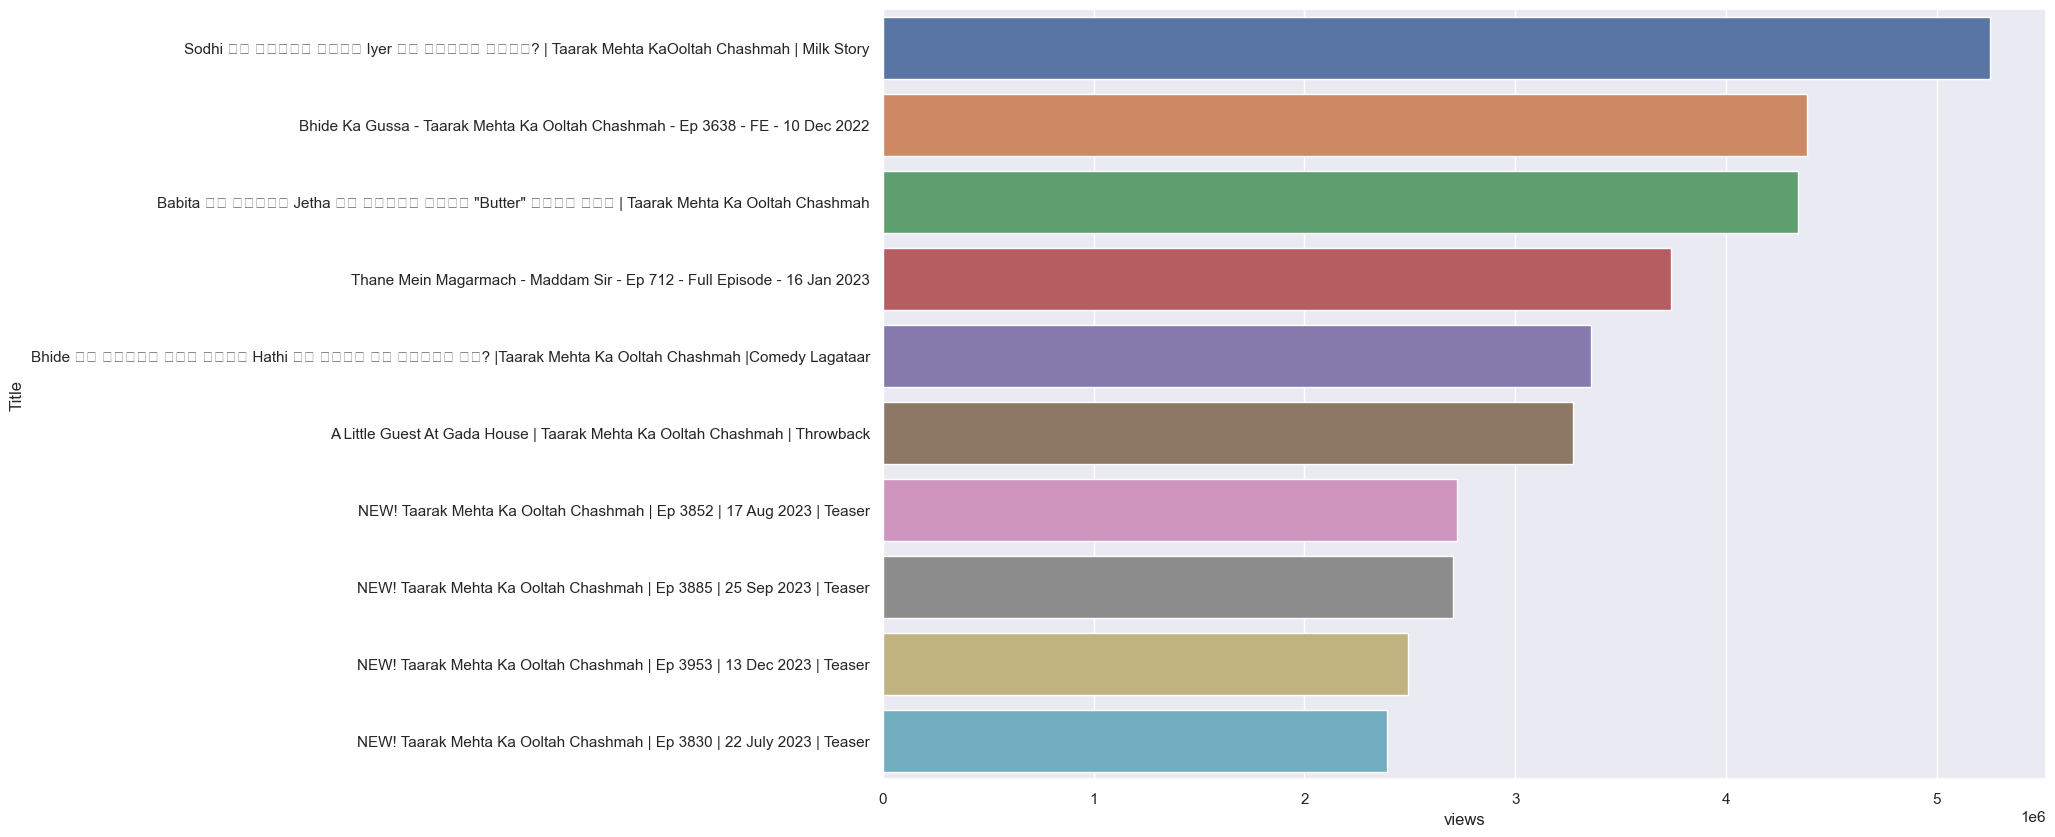

In [141]:
ax1 = sns.barplot(x='views', y='Title', data=top_10_videos)

In [131]:
video_data['Month'] = pd.to_datetime(video_data['published_date']).dt.strftime('%b')
video_data

,Title,published_date,views,likes,favouriteCount,comments,Month
0,कान्हा का आशीर्वाद हर problems से बचाता हैं #...,2024-01-23,25476,1007,0,4,Jan
1,Weekly ReLIV - Wagle Ki Duniya - Episodes 871 ...,2024-01-21,8831,72,0,8,Jan
2,Chachi Insults Jaidev | Aangan Aapno Kaa | Ep ...,2024-01-20,25953,679,0,11,Jan
3,Rajesh Leaves His Job | Wagle Ki Duniya | Ep 8...,2024-01-19,40283,587,0,30,Jan
4,Antidote Nahi Mil Raha | Dhruv Tara - Samay Sa...,2024-01-18,33816,852,0,25,Jan
...,...,...,...,...,...,...,...
395,Taarak Mehta Ka Ooltah Chashmah - तारक मेहता -...,2022-10-14,67348,1879,0,37,Oct
396,किसके लिए Gift लेकर इंतज़ार कर रहा है Jethalal?...,2022-10-13,950764,10670,0,107,Oct
397,NEW! Wagle Ki Duniya - Ep 477 - 11 Oct 2022 - ...,2022-10-11,72899,770,0,18,Oct
398,Maddam Sir - Ep 625 & Ep 626 - RECAP - मैड्डम सर,2022-10-09,177018,2611,0,22,Oct


##For each total number of videos posted

In [133]:
videos_per_month = video_data.groupby('Month', as_index= False).size()
videos_per_month

,Month,size
0,Apr,28
1,Aug,25
2,Dec,57
3,Feb,26
4,Jan,46
5,Jul,25
6,Jun,26
7,Mar,29
8,May,30
9,Nov,46


In [134]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [138]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered = True)
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,46
Feb,Feb,26
Mar,Mar,29
Apr,Apr,28
May,May,30
Jun,Jun,26
Jul,Jul,25
Aug,Aug,25
Sep,Sep,23


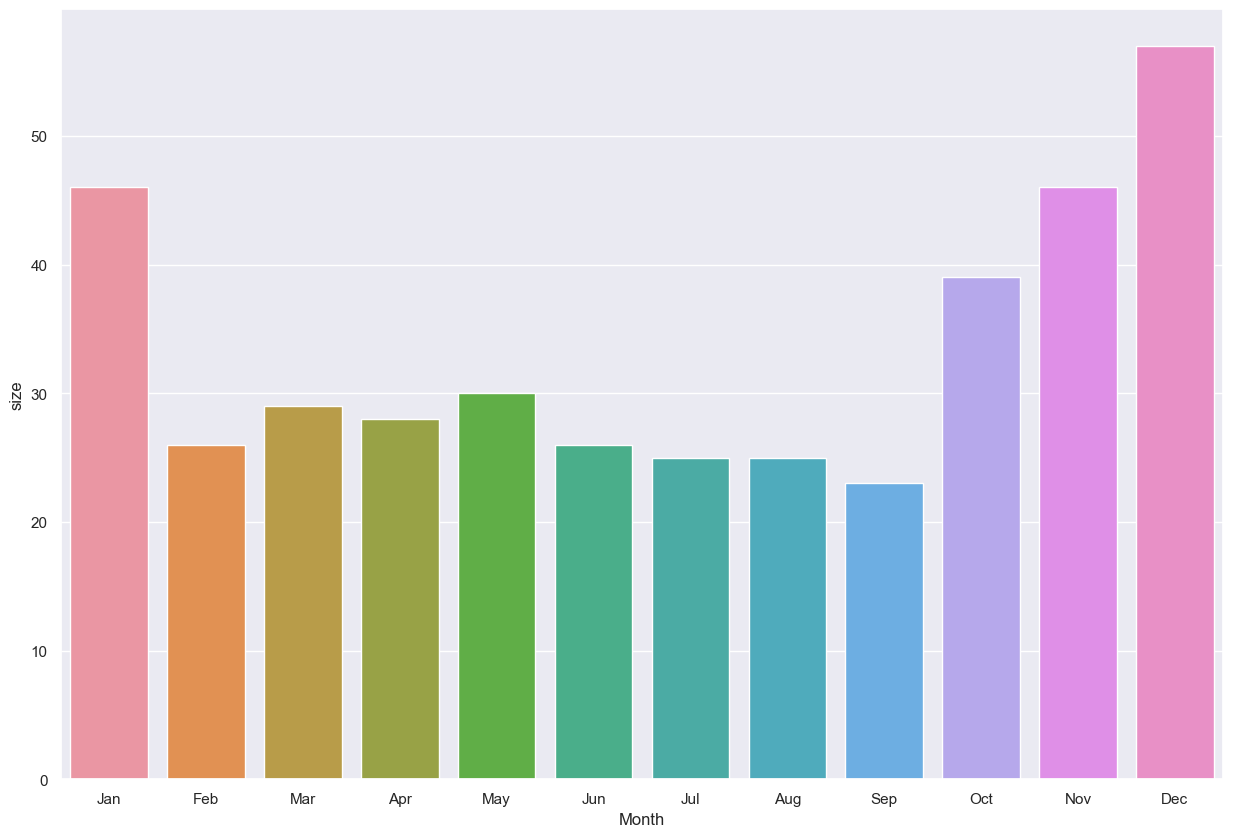

In [139]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)

In [142]:
video_data.to_csv('Video_Details(SonySAB).csv')